# Как започна всичко

![alt text](img/best.png "Title")

![alt text](img/hr.png "Hr")

Избрахме data set, сега да разгледаме какво съдържа...




Полетата в набора от данни включват:

<ul>
	<li>Ниво на удовлетвореност</li>
	<li>Последна оценка</li>
	<li>Брой проекти</li>
	<li>Средни месечни часове</li>
	<li>Времето, прекарано в компанията</li>
	<li>Дали са имали трудова злополука</li>
	<li>Дали са имали повишение през последните 5 години</li>
	<li>Отдел (column sales)</li>
	<li>Заплата</li>
	<li>Дали служителят е напуснал</li>
</ul>

<br>
<br>
<br>
За реализацията на проекта ще използвам python и блиблиотеки като pandas, nupy, sklearn и други
```
pip install numpy scipy matplotlib ipython scikit-learn pandas pillow mglearn jupyter
```

In [9]:
import sys

import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split


%matplotlib inline
# pd.options.display.max_rows = 15
pd.options.mode.chained_assignment = None  # default='warn'
# pd.options.mode.chained_assignment = 'warn'  # default=

Нека да заредим данните и да ги разделим на train и validate множества

In [3]:
data = pd.read_csv('HR_comma_sep.csv')
data_no_left = data.drop(labels=['left'], axis=1)
data_left = data['left']
x_train, x_val, y_train, y_val = train_test_split(data_no_left, data_left, test_size=0.15, random_state=4330)
print("Размери на всичките данни",data.shape)
print("Размери на train",x_train.shape)
print("Размери на validate",x_val.shape)

Размери на всичките данни (14999, 10)
Размери на train (12749, 9)
Размери на validate (2250, 9)


За начало да видим колко време средно прекарват служителите в компанията

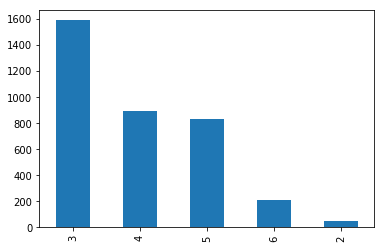

In [4]:
data[data.left == True].time_spend_company.value_counts().plot(kind='bar');

Вижда се, че най-често хората напускат след 3-та си година в компанията

In [5]:
data.dtypes[data.dtypes == 'object']

sales     object
salary    object
dtype: object

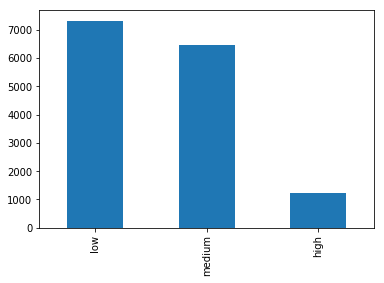

In [6]:
data.salary.value_counts().plot(kind='bar');

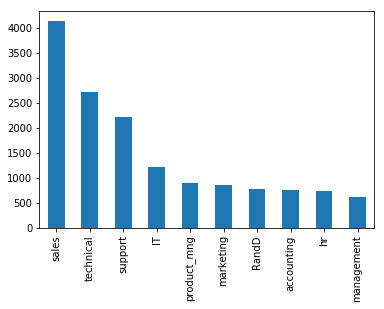

In [7]:
data.sales.value_counts().plot(kind='bar');

Виждаме 2 категориини колони, които биха могли да направят проблем при по-нататъчна работа с данните. Ще направим One Hot Encoding

In [10]:
encoded_x_train = x_train
encoded_x_train['low_salary'] = (x_train.salary == 'low').astype(float)
encoded_x_train['medium_salary'] = (x_train.salary == 'medium').astype(float)
encoded_x_train['high_salary'] = (x_train.salary == 'high').astype(float)
encoded_x_train = encoded_x_train.drop('salary', axis=1)

encoded_x_train['sales_sales'] = (x_train.sales == 'sales').astype(float)
encoded_x_train['technical_sales'] = (x_train.sales == 'technical').astype(float)
encoded_x_train['support_sales'] = (x_train.sales == 'support').astype(float)
encoded_x_train['IT_sales'] = (x_train.sales == 'IT').astype(float)
encoded_x_train['product_mng_sales'] = (x_train.sales == 'product_mng').astype(float)
encoded_x_train['marketing_sales'] = (x_train.sales == 'marketing_sales').astype(float)
encoded_x_train['RandD_sales'] = (x_train.sales == 'RandD').astype(float)
encoded_x_train['accounting_sales'] = (x_train.sales == 'accounting').astype(float)
encoded_x_train['hr_sales'] = (x_train.sales == 'hr').astype(float)
encoded_x_train['management_sales'] = (x_train.sales == 'management').astype(float)
encoded_x_train = encoded_x_train.drop('sales', axis=1)

In [11]:
encoded_x_val = x_val
encoded_x_val['low_salary'] = (x_val.salary == 'low').astype(float)
encoded_x_val['medium_salary'] = (x_val.salary == 'medium').astype(float)
encoded_x_val['high_salary'] = (x_val.salary == 'high').astype(float)
encoded_x_val = encoded_x_val.drop('salary', axis=1)


encoded_x_val['sales_sales'] = (encoded_x_val.sales == 'sales').astype(float)
encoded_x_val['technical_sales'] = (encoded_x_val.sales == 'technical').astype(float)
encoded_x_val['support_sales'] = (encoded_x_val.sales == 'support').astype(float)
encoded_x_val['IT_sales'] = (encoded_x_val.sales == 'IT').astype(float)
encoded_x_val['product_mng_sales'] = (encoded_x_val.sales == 'product_mng').astype(float)
encoded_x_val['marketing_sales'] = (encoded_x_val.sales == 'marketing_sales').astype(float)
encoded_x_val['RandD_sales'] = (encoded_x_val.sales == 'RandD').astype(float)
encoded_x_val['accounting_sales'] = (encoded_x_val.sales == 'accounting').astype(float)
encoded_x_val['hr_sales'] = (encoded_x_val.sales == 'hr').astype(float)
encoded_x_val['management_sales'] = (encoded_x_val.sales == 'management').astype(float)
encoded_x_val = encoded_x_val.drop('sales', axis=1)

In [12]:
encoded_x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low_salary,medium_salary,high_salary,sales_sales,technical_sales,support_sales,IT_sales,product_mng_sales,marketing_sales,RandD_sales,accounting_sales,hr_sales,management_sales
1397,0.43,0.53,2,146,3,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11702,0.87,0.90,3,174,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1485,0.11,0.88,7,253,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10061,0.96,0.95,6,215,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7964,0.91,0.61,3,255,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10843,0.95,0.62,4,150,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14787,0.48,0.78,2,198,2,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5527,0.61,0.61,4,239,2,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3459,0.63,0.62,5,212,6,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9302,0.76,0.80,3,202,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Ще пробвам няколко алгоритъма за машинно самообучение и ще видим как се представят

За начало - Логистична Регресия

In [13]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression().fit(encoded_x_train, y_train)

print("Резултат при трениране: {:.3f}".format(logReg.score(encoded_x_train, y_train)))
print("Резултат при тест:     {:.3f}".format(logReg.score(encoded_x_val, y_val)))

Резултат при трениране: 0.788
Резултат при тест:     0.799


И крос валидация

In [94]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
# scores = cross_validate(logReg, encoded_x_train, y_train, scoring=scoring,cv=5, return_train_score=False)

scores = cross_validate(LogisticRegression(), encoded_x_train, y_train, cv=5)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.030669,0.001002,0.792941,0.787724
1,0.032087,0.000853,0.790196,0.789489
2,0.030064,0.000849,0.786667,0.783508
3,0.025840,0.000830,0.789020,0.789685
4,0.030858,0.000844,0.775206,0.791373


Не много добре, нека да регуляризираме.

In [122]:
scores = cross_validate(LogisticRegression(C=100), encoded_x_train, y_train, cv=5)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.042000,0.000932,0.793333,0.787626
1,0.028671,0.000932,0.792157,0.789783
2,0.027283,0.000856,0.785098,0.783606
3,0.040849,0.000857,0.788627,0.790470
4,0.026492,0.000842,0.774421,0.790980


In [130]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(LogisticRegression(), {'C': [1,10, 30, 50, 70, 100]})
search.fit(encoded_x_train, y_train)
pd.DataFrame(search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.025425,0.001238,0.785944,0.788689,1,{'C': 1},1,0.789647,0.787269,0.789176,0.787622,0.779007,0.791176,0.001649,0.000109,0.004909,0.001765
1,0.022631,0.001199,0.785709,0.789317,10,{'C': 10},2,0.789647,0.788093,0.789882,0.788799,0.777595,0.791059,0.001286,0.000013,0.005738,0.001265
2,0.024201,0.001290,0.785552,0.789356,30,{'C': 30},3,0.789647,0.788093,0.789412,0.788916,0.777595,0.791059,0.001685,0.000166,0.005627,0.001250
3,0.024787,0.001272,0.785552,0.789356,50,{'C': 50},3,0.789647,0.788093,0.789412,0.788916,0.777595,0.791059,0.002771,0.000104,0.005627,0.001250
4,0.023456,0.001162,0.785552,0.789434,70,{'C': 70},3,0.789647,0.788328,0.789412,0.788916,0.777595,0.791059,0.000685,0.000023,0.005627,0.001173
5,0.024775,0.002013,0.785473,0.789434,100,{'C': 100},6,0.789647,0.788328,0.789412,0.788916,0.777359,0.791059,0.002664,0.001136,0.005738,0.001173


Няма положителна разлика. 

Нека да видим какви тегла е открил модела

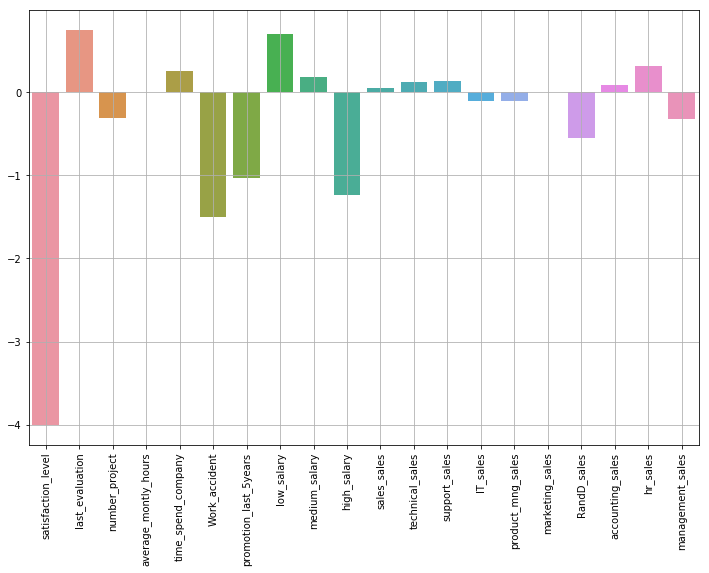

In [15]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)
    
logistic_regression_features(encoded_x_train, logReg)

Логично, нивото на удволетвореност указва най-голямо влияние. Следвао от инцидентите по време на работа, заплатата и от това дали работника е получавал повишение на скоро.

In [102]:
logistic_regression_features(encoded_x_train.drop(labels=['satisfaction_level'], axis=1), logReg)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low_salary,medium_salary,high_salary,sales_sales,technical_sales,support_sales,IT_sales,product_mng_sales,marketing_sales,RandD_sales,accounting_sales,hr_sales,management_sales
1397,0.43,0.53,2,146,3,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11702,0.87,0.90,3,174,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1485,0.11,0.88,7,253,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10061,0.96,0.95,6,215,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7964,0.91,0.61,3,255,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10843,0.95,0.62,4,150,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14787,0.48,0.78,2,198,2,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,0.15,0.75,3,150,4,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7002,0.68,0.75,5,243,3,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Нека да пробваме с друго - Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
scores = cross_validate(DecisionTreeClassifier(), encoded_x_train, y_train, cv=5)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.036692,0.001754,0.975294,1.0
1,0.037143,0.001802,0.977647,1.0
2,0.028758,0.001155,0.977647,1.0
3,0.026230,0.001120,0.977647,1.0
4,0.029512,0.001207,0.979208,1.0


А с Random Forest?

In [120]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_validate(RandomForestClassifier(), encoded_x_train, y_train, cv=5)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.073862,0.004336,0.986667,0.997255
1,0.062481,0.004246,0.987059,0.997941
2,0.061358,0.004317,0.987059,0.998235
3,0.061930,0.004474,0.985098,0.997843
4,0.064989,0.006701,0.986661,0.997549


In [121]:
randF = RandomForestClassifier().fit(encoded_x_train, y_train)
print("Резултат при трениране: {:.3f}".format(randF.score(encoded_x_train, y_train)))
print("Резултат при тест:     {:.3f}".format(randF.score(encoded_x_val, y_val)))

Резултат при трениране: 0.999
Резултат при тест:     0.991


Много добре, а със Support Vector Machine

In [138]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

scores = cross_validate(SVC(), encoded_x_train, y_train, cv=5)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,1.873162,0.194095,0.952157,0.953917
1,1.966421,0.191910,0.946667,0.956760
2,2.059840,0.227189,0.951765,0.956074
3,2.023896,0.214552,0.955294,0.953721
4,1.846926,0.202804,0.944292,0.955392


С регуляризация

In [139]:
scores = cross_validate(SVC(C=10, gamma=0.1), encoded_x_train, y_train, cv=5)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,1.864640,0.160563,0.970196,0.987450
1,1.824926,0.156835,0.967843,0.988528
2,1.910439,0.183517,0.960000,0.989901
3,2.024633,0.153303,0.967843,0.988038
4,1.905313,0.162184,0.965477,0.989314


Добре, като за последно да пробваме и с невронни мрежи.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

 Ще ползвам Sequential на kerass с активираща фунция [Relu](https://cdn-images-1.medium.com/max/1600/1*JtJaS_wPTCshSvAFlCu_Wg.png) и [Softmax](https://cdn-images-1.medium.com/max/1200/1*Be3Bhz0BA-NgZIYqRVZtug.gif) за поседния слой

In [177]:
NNmodel = Sequential()
NNmodel.add(Dense(64, input_dim=encoded_x_train.shape[1], activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(64, activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(1, activation='sigmoid'))

NNmodel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

NNmodel.fit(encoded_x_train, y_train,
          epochs=20,
          batch_size=128)
score = NNmodel.evaluate(encoded_x_val, y_val, batch_size=128)
# pd.DataFrame(score)

Epoch 1/20
12749/12749 [==============================] - 1s 68us/step - loss: 3.9346 - acc: 0.7419
Epoch 2/20
12749/12749 [==============================] - 0s 28us/step - loss: 3.7943 - acc: 0.7623
Epoch 3/20
12749/12749 [==============================] - 0s 30us/step - loss: 3.7845 - acc: 0.7627
Epoch 4/20
12749/12749 [==============================] - 0s 30us/step - loss: 3.7848 - acc: 0.7625
Epoch 5/20
12749/12749 [==============================] - 0s 32us/step - loss: 3.7468 - acc: 0.7536
Epoch 6/20
12749/12749 [==============================] - 0s 31us/step - loss: 3.5913 - acc: 0.7353
Epoch 7/20
12749/12749 [==============================] - 0s 28us/step - loss: 2.1281 - acc: 0.6652
Epoch 8/20
12749/12749 [==============================] - 0s 30us/step - loss: 0.7178 - acc: 0.7204
Epoch 9/20
12749/12749 [==============================] - 0s 27us/step - loss: 0.6009 - acc: 0.7592
Epoch 10/20
12749/12749 [==============================] - 0s 31us/step - loss: 0.5844 - acc: 0.7628

С друга архитектура

In [178]:
NNmodel = Sequential()
NNmodel.add(Dense(128, input_dim=encoded_x_train.shape[1], activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(128, activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(128, activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(1, activation='sigmoid'))

NNmodel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

NNmodel.fit(encoded_x_train, y_train,
          epochs=20,
          batch_size=128)
score = NNmodel.evaluate(encoded_x_val, y_val, batch_size=128)

Epoch 1/20
12749/12749 [==============================] - 1s 90us/step - loss: 3.2847 - acc: 0.7123
Epoch 2/20
12749/12749 [==============================] - 1s 44us/step - loss: 1.3042 - acc: 0.6544
Epoch 3/20
12749/12749 [==============================] - 1s 44us/step - loss: 0.6604 - acc: 0.7173
Epoch 4/20
12749/12749 [==============================] - 1s 45us/step - loss: 0.5919 - acc: 0.7567
Epoch 5/20
12749/12749 [==============================] - 1s 49us/step - loss: 0.5780 - acc: 0.7629
Epoch 6/20
12749/12749 [==============================] - 1s 51us/step - loss: 0.5742 - acc: 0.7641
Epoch 7/20
12749/12749 [==============================] - 1s 60us/step - loss: 0.5670 - acc: 0.7643
Epoch 8/20
12749/12749 [==============================] - 1s 52us/step - loss: 0.5623 - acc: 0.7643
Epoch 9/20
12749/12749 [==============================] - 1s 47us/step - loss: 0.5608 - acc: 0.7643
Epoch 10/20
12749/12749 [==============================] - 1s 51us/step - loss: 0.5533 - acc: 0.7643

С повече епохи

In [179]:
NNmodel = Sequential()
NNmodel.add(Dense(128, input_dim=encoded_x_train.shape[1], activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(128, activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(128, activation='relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(1, activation='sigmoid'))

NNmodel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

NNmodel.fit(encoded_x_train, y_train,
          epochs=50,
          batch_size=128)
score = NNmodel.evaluate(encoded_x_val, y_val, batch_size=128)

Epoch 1/50
12749/12749 [==============================] - 1s 91us/step - loss: 3.4486 - acc: 0.7205
Epoch 2/50
12749/12749 [==============================] - 1s 44us/step - loss: 1.2924 - acc: 0.6567
Epoch 3/50
12749/12749 [==============================] - 1s 45us/step - loss: 0.6535 - acc: 0.7230
Epoch 4/50
12749/12749 [==============================] - 1s 43us/step - loss: 0.6050 - acc: 0.7541
Epoch 5/50
12749/12749 [==============================] - 1s 44us/step - loss: 0.5839 - acc: 0.7628
Epoch 6/50
12749/12749 [==============================] - 1s 44us/step - loss: 0.5679 - acc: 0.7642
Epoch 7/50
12749/12749 [==============================] - 1s 50us/step - loss: 0.5679 - acc: 0.7643
Epoch 8/50
12749/12749 [==============================] - 1s 46us/step - loss: 0.5628 - acc: 0.7643
Epoch 9/50
12749/12749 [==============================] - 1s 46us/step - loss: 0.5585 - acc: 0.7643
Epoch 10/50
12749/12749 [==============================] - 1s 45us/step - loss: 0.5570 - acc: 0.7643